Cell 1: Library import

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


Cell 2: COVID-19

In [10]:
# Load the Covid-19 dataset
# Note: Ensure the filename matches exactly what you downloaded
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")

# Drop columns that are not needed for this analysis (Latitude and Longitude)
dataset.drop(["Lat", "Long"], axis=1, inplace=True)

# Aggregate the data by Country/Region (Summing up rows for same countries)
corona_dataset_aggregated = dataset.groupby("Country/Region").sum(numeric_only=True)

# Display the first 5 rows to check data
corona_dataset_aggregated.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Cell 3: Data visualization

Visualizing trends for China, India, and Spain...


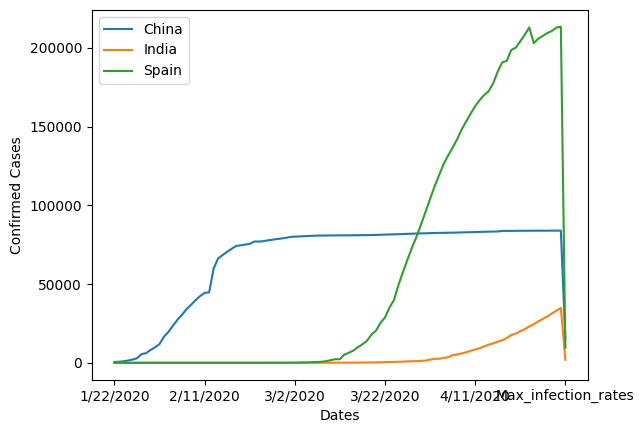

In [16]:
# Visualizing confirmed cases for specific countries
print("Visualizing trends for China, India, and Spain...")
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Confirmed Cases")
plt.show()

Cell 4:  Maximum Infection Rate

In [17]:
# Calculate the first derivative (daily increase) to find the max infection rate
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    # Calculate max daily increase for each country
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

# Add this new column to our dataset
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates

# Create a new DataFrame with only the needed column
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])
corona_data.head()

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


Cell 5: Happiness Report

In [18]:
# Load the Worldwide Happiness Report
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

# Drop useless columns to focus on GDP, Social support, etc.
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happiness_report.drop(useless_cols, axis=1, inplace=True)

# Set 'Country or region' as the index so we can join it with Covid data
happiness_report.set_index("Country or region", inplace=True)

happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Cell 6:  Our data sets (Merging)

In [19]:
# Join the two datasets using Inner Join
data = corona_data.join(happiness_report, how="inner")

# Check the final combined dataframe
data.head()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


Cell 7: (Correlation & Insights)

Correlation Matrix:
                              Max_infection_rates  GDP per capita  \
Max_infection_rates                      1.000000        0.250118   
GDP per capita                           0.250118        1.000000   
Social support                           0.191958        0.759468   
Healthy life expectancy                  0.289263        0.863062   
Freedom to make life choices             0.078196        0.394603   

                              Social support  Healthy life expectancy  \
Max_infection_rates                 0.191958                 0.289263   
GDP per capita                      0.759468                 0.863062   
Social support                      1.000000                 0.765286   
Healthy life expectancy             0.765286                 1.000000   
Freedom to make life choices        0.456246                 0.427892   

                              Freedom to make life choices  
Max_infection_rates                               0.078196  
GDP 

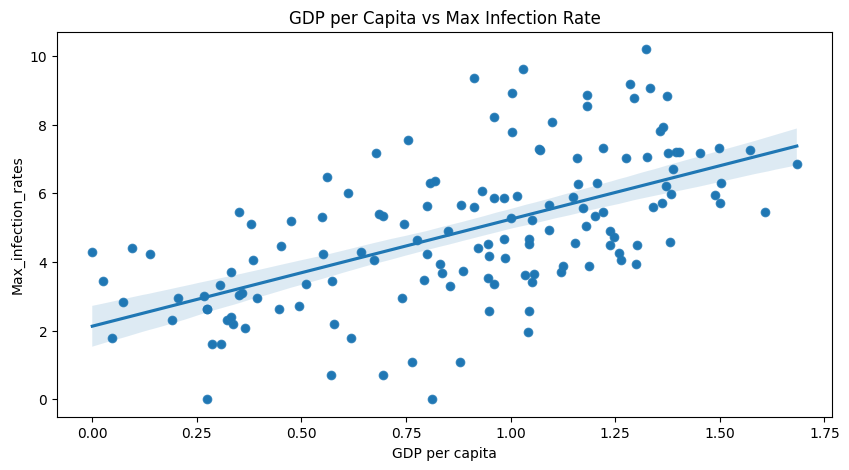

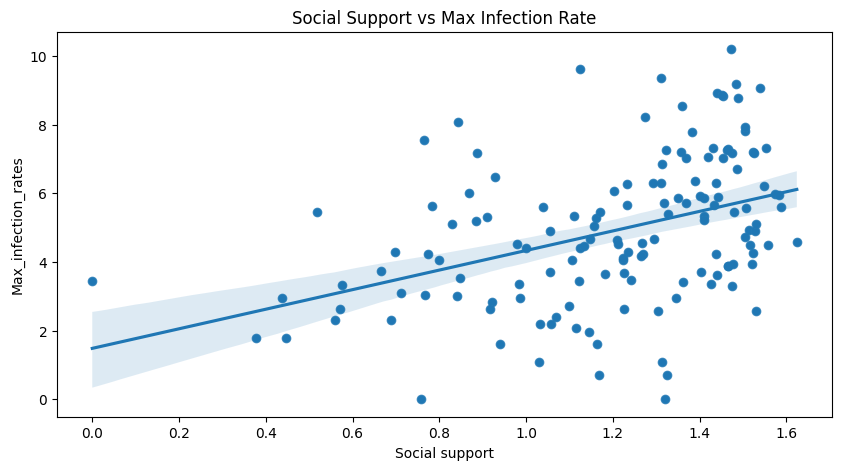

In [20]:
# Calculate the correlation matrix
print("Correlation Matrix:")
print(data.corr())

# Visualize: GDP vs Max Infection Rate
plt.figure(figsize=(10,5))
x = data["GDP per capita"]
y = data["Max_infection_rates"]
# Using log scale for y-axis for better visibility
sns.scatterplot(x=x, y=np.log(y)) 
sns.regplot(x=x, y=np.log(y))
plt.title("GDP per Capita vs Max Infection Rate")
plt.show()

# Visualize: Social Support vs Max Infection Rate
plt.figure(figsize=(10,5))
x = data["Social support"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))
sns.regplot(x=x, y=np.log(y))
plt.title("Social Support vs Max Infection Rate")
plt.show()